In [2]:
pip install keras


Note: you may need to restart the kernel to use updated packages.


классическая русская литература
===

In [3]:
import os
import re

path = './books/'
books = os.listdir(path)
all_text = []
for b in books:
    with open(path + b) as file:
        all_text.append(re.findall(r'\w+', file.read().lower()))

FileNotFoundError: [WinError 3] Системе не удается найти указанный путь: './books/'

In [2]:
from gensim.models.phrases import Phraser, Phrases
bigram = Phrases(all_text)
bigram_transformer = Phraser(bigram)

In [3]:
def text_geneterot_bigram():
    for text in all_text:
        yield bigram_transformer[[w for w in text]]

In [4]:
[i.decode() for i in list(bigram.vocab.keys()) if '_' in i.decode()][:10]

['антон_павлович',
 'павлович_чехов',
 'чехов_75000',
 '75000_ночью',
 'ночью_часов',
 'часов_в',
 'в_12',
 '12_по',
 'по_тверскому',
 'тверскому_бульвару']

In [5]:
from gensim.models.word2vec import Word2Vec
model = Word2Vec(size=100, window=7, min_count=10, workers=10)
model.build_vocab(all_text)
model.train(all_text, total_examples=model.corpus_count, epochs=model.epochs)

(14514215, 54294365)

In [8]:
model.most_similar('лев')

C:\Users\Bogdan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('николаевич', 0.9008417129516602),
 ('наркисович', 0.8905894160270691),
 ('мамин', 0.8871534466743469),
 ('щедрин', 0.8834531307220459),
 ('сибиряк', 0.883063554763794),
 ('феофилактович', 0.8829348087310791),
 ('писемский', 0.8807162046432495),
 ('толстой', 0.8763442635536194),
 ('достоевский', 0.8746312856674194),
 ('салтыков', 0.8715686798095703)]

In [9]:
model.most_similar_cosmul("лев", "человек")

C:\Users\Bogdan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar_cosmul` (Method will be removed in 4.0.0, use self.wv.most_similar_cosmul() instead).
  """Entry point for launching an IPython kernel.


[('доверчив', 57.866973876953125),
 ('содроганием', 56.412391662597656),
 ('повеселевшим', 54.266902923583984),
 ('тунгусов', 46.57536697387695),
 ('изумленными', 46.16642379760742),
 ('райнером', 44.752418518066406),
 ('агафьей', 44.71990966796875),
 ('скрутить', 43.30238723754883),
 ('огорченно', 41.83283233642578),
 ('посмотрят', 41.450599670410156)]

In [10]:
model.most_similar(positive=['человек', 'вода'], negative=['женщина'])

C:\Users\Bogdan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('народ', 0.7387912273406982),
 ('солдат', 0.6814917922019958),
 ('лес', 0.656775712966919),
 ('камень', 0.6259007453918457),
 ('медведь', 0.6084969639778137),
 ('мужик', 0.604680061340332),
 ('вырос', 0.6010502576828003),
 ('снег', 0.5940864086151123),
 ('обоз', 0.5894851088523865),
 ('дуб', 0.5872336626052856)]

Dump Wiki
===

[dumps](https://dumps.wikimedia.org/ruwiki/latest/)

In [1]:
from gensim.corpora.wikicorpus import WikiCorpus
from gensim.models.phrases import Phraser, Phrases
from gensim.models.word2vec import Word2Vec
from time import time
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')

wiki = WikiCorpus('ruwiki-latest-pages-articles.xml.bz2', dictionary=False)

In [2]:
start = time()

bigram = Phrases(wiki.get_texts())
bigram_transformer = Phraser(bigram)

def text_geneterot_bigram():
    for text in wiki.get_texts():
        yield bigram_transformer[text]
print(time() - start, 'point one')
        
    
trigram = Phrases(text_geneterot_bigram())
trigram_transformer = Phraser(trigram)
def text_geneterot_trigram():
    for text in wiki.get_texts():
        yield trigram_transformer[bigram_transformer[text]]
print(time() - start, 'point two')


model = Word2Vec(size=100, window=7, min_count=10, workers=10)
model.build_vocab(text_geneterot_trigram())
print(time() - start, 'point three')
model.train(text_geneterot_trigram(), total_examples=model.corpus_count, epochs=model.epochs)
print(time() - start, 'finish')

4023.204165458679 point one
9213.639261960983 point two
14975.569536924362 point three
20311.496700763702 finish


In [3]:
import pickle
pickle.dump(model, open('word2vec', 'wb'))

In [7]:
model.wv.most_similar(positive=['король','женщина'], negative=['мужчина'])

[('королева', 0.7384017705917358),
 ('империя', 0.7043378353118896),
 ('императрица', 0.6738594174385071),
 ('принцесса', 0.6579424142837524),
 ('правительница', 0.655333399772644),
 ('королевой', 0.6071252822875977),
 ('герцогиня', 0.5955508351325989),
 ('королева_елизавета', 0.5924015045166016),
 ('королевская_семья', 0.5916932821273804),
 ('венецианская_республика', 0.5910322070121765)]

In [8]:
model.wv.most_similar(positive=['математик','женщина'], negative=['мужчина'])

[('учёная', 0.729953408241272),
 ('доктор_филологических_наук', 0.7261648774147034),
 ('филолог', 0.6973267793655396),
 ('доктор_философских_наук', 0.6920692324638367),
 ('поэтесса', 0.6864198446273804),
 ('доктор_философии', 0.682542085647583),
 ('американский_математик', 0.6808996200561523),
 ('переводчица', 0.6743535995483398),
 ('кандидат_филологических_наук', 0.6712615489959717),
 ('этномузыковед', 0.6689277291297913)]

In [9]:
model.wv.most_similar(positive=['москва','франция'], negative=['россия'])

[('париж', 0.7040236592292786),
 ('жак', 0.6824785470962524),
 ('фр', 0.6766302585601807),
 ('жан', 0.6739745736122131),
 ('жорж', 0.6730591654777527),
 ('анри', 0.6725378036499023),
 ('марсель', 0.6620060205459595),
 ('пьер', 0.6486740112304688),
 ('поль', 0.6456040143966675),
 ('париж_франция', 0.6314656734466553)]

In [18]:
model.wv.most_similar(positive=['любовь', "мир"])

[('светлое_будущее', 0.7709049582481384),
 ('одиночество', 0.7440266609191895),
 ('счастье', 0.7315576076507568),
 ('радость', 0.7288451194763184),
 ('совесть', 0.725634753704071),
 ('бессмертие', 0.7078778147697449),
 ('печаль', 0.7054910659790039),
 ('страсть', 0.7044861316680908),
 ('красота', 0.7037808895111084),
 ('добра', 0.6997663974761963)]

In [16]:
model.wv.most_similar(positive=['герой'])

[('главный_герой', 0.7804614305496216),
 ('воин', 0.738084077835083),
 ('героя', 0.7122530937194824),
 ('героем', 0.7051619291305542),
 ('главный_злодей', 0.6971005201339722),
 ('главный_герой_романа', 0.6700918078422546),
 ('враг', 0.6672258377075195),
 ('персонаж', 0.662002444267273),
 ('злодей', 0.6607800126075745),
 ('герою', 0.6597226858139038)]

In [16]:
import pickle
test = pickle.load(open('word2vec', 'rb'))
test.wv.most_similar(positive=['любовь', "мир"])

[('светлое_будущее', 0.7709049582481384),
 ('одиночество', 0.7440266609191895),
 ('счастье', 0.7315576076507568),
 ('радость', 0.7288451194763184),
 ('совесть', 0.725634753704071),
 ('бессмертие', 0.7078778147697449),
 ('печаль', 0.7054910659790039),
 ('страсть', 0.7044861316680908),
 ('красота', 0.7037808895111084),
 ('добра', 0.6997663974761963)]

[ссылка на проект](https://github.com/Bogdankozlovskiy/word2vec3.5)

***

In [4]:
import numpy as np
timesteps = 100
input_features = 32
output_features = 64

inputs = np.random.random((timesteps, input_features))
state_t = np.zeros((output_features,))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

successive_outputs = []
for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    successive_outputs.append(output_t)
    state_t = output_t

final_output_sequence = np.concatenate(successive_outputs, axis=0)

In [6]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Embedding, Dense
from keras.preprocessing import sequence
from keras.datasets import imdb

#np_load_old = np.load
#np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

max_features = 10 ** 4
maxlen = 500
batch_size = 32

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
np.load = np_load_old

x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

TypeError: load() got multiple values for keyword argument 'allow_pickle'

In [5]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

In [7]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [8]:
history = model.fit(x_train, y_train, epochs=10, batch_size=batch_size, validation_split=0.2)

W0818 18:00:27.532576  7056 deprecation_wrapper.py:119] From C:\Users\Bogdan\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 179s 9ms/step - loss: 0.5038 - acc: 0.7435 - val_loss: 0.3667 - val_acc: 0.8520
Epoch 2/10
20000/20000 [==============================] - 169s 8ms/step - loss: 0.3368 - acc: 0.8632 - val_loss: 0.3256 - val_acc: 0.8760
Epoch 3/10
20000/20000 [==============================] - 167s 8ms/step - loss: 0.2764 - acc: 0.8918 - val_loss: 0.3150 - val_acc: 0.8764
Epoch 4/10
20000/20000 [==============================] - 172s 9ms/step - loss: 0.2434 - acc: 0.9058 - val_loss: 0.3257 - val_acc: 0.8632
Epoch 5/10
20000/20000 [==============================] - 169s 8ms/step - loss: 0.2550 - acc: 0.9054 - val_loss: 0.3275 - val_acc: 0.8750
Epoch 6/10
20000/20000 [==============================] - 169s 8ms/step - loss: 0.2052 - acc: 0.9233 - val_loss: 0.3512 - val_acc: 0.8526
Epoch 7/10
20000/20000 [==============================] - 169s 8ms/step - loss: 0.1818 - acc: 0.9321 - val_loss: 0.3726 - v

In [9]:
from matplotlib import pyplot as plt
%matplotlib inline

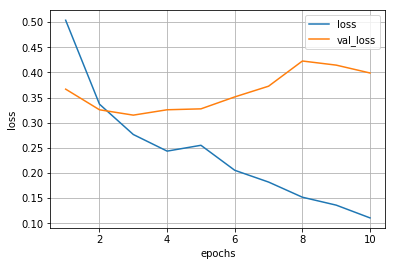

In [16]:
plt.plot(range(1, 11), history.history['loss'], label='loss')
plt.plot(range(1, 11), history.history['val_loss'], label='val_loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid(True)

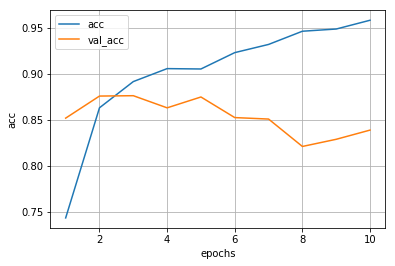

In [17]:
plt.plot(range(1, 11), history.history['acc'], label='acc')
plt.plot(range(1, 11), history.history['val_acc'], label='val_acc')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('acc')
plt.grid(True)

***

LSTM(Long Short Time Memory)
===

In [9]:
from keras.layers import LSTM
from matplotlib import pyplot as plt

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [7]:
history = model.fit(x_train, y_train, epochs=10, batch_size=batch_size, validation_split=0.2)

W0819 18:29:30.639488  7748 deprecation_wrapper.py:119] From C:\Users\Bogdan\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 715s 36ms/step - loss: 0.4203 - acc: 0.8084 - val_loss: 0.3176 - val_acc: 0.8674
Epoch 2/10
20000/20000 [==============================] - 711s 36ms/step - loss: 0.2782 - acc: 0.8931 - val_loss: 0.2989 - val_acc: 0.8738
Epoch 3/10
20000/20000 [==============================] - 712s 36ms/step - loss: 0.2225 - acc: 0.9186 - val_loss: 0.2895 - val_acc: 0.8824
Epoch 4/10
20000/20000 [==============================] - 712s 36ms/step - loss: 0.1997 - acc: 0.9260 - val_loss: 0.3155 - val_acc: 0.8788
Epoch 5/10
20000/20000 [==============================] - 709s 35ms/step - loss: 0.1851 - acc: 0.9326 - val_loss: 0.2733 - val_acc: 0.8920
Epoch 6/10
20000/20000 [==============================] - 714s 36ms/step - loss: 0.1694 - acc: 0.9382 - val_loss: 0.2755 - val_acc: 0.8890
Epoch 7/10
20000/20000 [==============================] - 709s 35ms/step - loss: 0.1540 - acc: 0.9451 - val_loss: 0.2

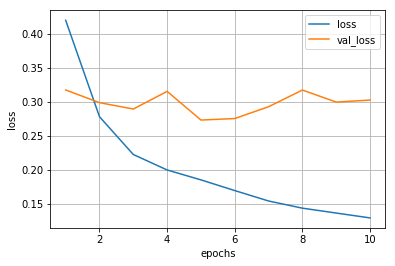

In [10]:
plt.plot(range(1, 11), history.history['loss'], label='loss')
plt.plot(range(1, 11), history.history['val_loss'], label='val_loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid(True)

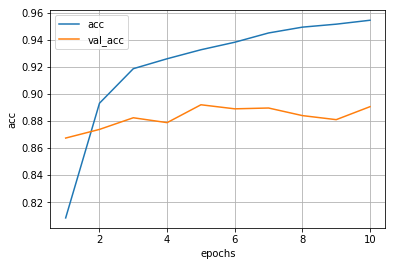

In [11]:
plt.plot(range(1, 11), history.history['acc'], label='acc')
plt.plot(range(1, 11), history.history['val_acc'], label='val_acc')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('acc')
plt.grid(True)

## Борьба с переобучением

Помими стандартных подходов для борьбы с переобучением как регуляризация и Dropout, в рекурентных сетях есть recurrent_dropout  - определяет долю прореживания рекурентных значений

### Наложение нескольких рекурентных слоев

In [5]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from keras.optimizers import Adam


model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [7]:
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['acc'])

In [7]:
history = model.fit(x_train, y_train, epochs=5, batch_size=batch_size, validation_data=(x_test, y_test))

W0821 16:16:12.105794  6472 deprecation_wrapper.py:119] From C:\Users\Bogdan\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 523s 21ms/step - loss: 0.6367 - acc: 0.5993 - val_loss: 0.5281 - val_acc: 0.7418
Epoch 2/5
25000/25000 [==============================] - 514s 21ms/step - loss: 0.4470 - acc: 0.7942 - val_loss: 0.4877 - val_acc: 0.7793
Epoch 3/5
25000/25000 [==============================] - 518s 21ms/step - loss: 0.3548 - acc: 0.8454 - val_loss: 0.4154 - val_acc: 0.8145
Epoch 4/5
25000/25000 [==============================] - 534s 21ms/step - loss: 0.2880 - acc: 0.8799 - val_loss: 0.4018 - val_acc: 0.8258
Epoch 5/5
25000/25000 [==============================] - 515s 21ms/step - loss: 0.1925 - acc: 0.9263 - val_loss: 0.4372 - val_acc: 0.8302


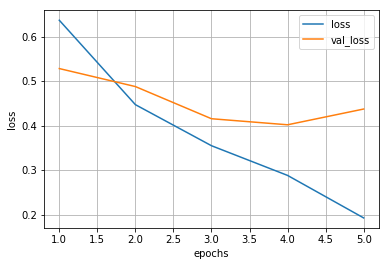

In [10]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.plot(range(1, 6), history.history['loss'], label='loss')
plt.plot(range(1, 6), history.history['val_loss'], label='val_loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid(True)

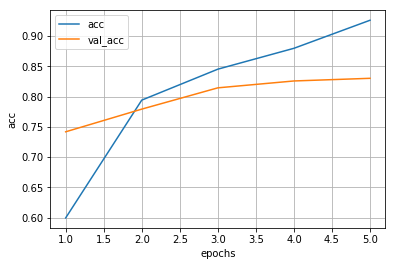

In [11]:
plt.plot(range(1, 6), history.history['acc'], label='acc')
plt.plot(range(1, 6), history.history['val_acc'], label='val_acc')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('acc')
plt.grid(True)

In [ ]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from keras.optimizers import Adam


model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32, return_sequences=True, dropout=0.1, recurrent_dropout=0.3))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['acc'])

history2 = model.fit(x_train, y_train, epochs=5, batch_size=batch_size, validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
24992/25000 [============================>.] - ETA: 0s - loss: 0.7048 - acc: 0.4992

In [ ]:
plt.plot(range(1, 6), history.history['loss'], label='loss')
plt.plot(range(1, 6), history.history['val_loss'], label='val_loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid(True)

In [ ]:
plt.plot(range(1, 6), history.history['acc'], label='acc')
plt.plot(range(1, 6), history.history['val_acc'], label='val_acc')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('acc')
plt.grid(True)